### YOLO Modeling

#### 학습 및 테스트 데이터 생성(oxford-pet)

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import torch
from torch.utils.data import random_split

In [3]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo checks



Ultralytics YOLOv8.0.222 🚀 Python-3.10.13 torch-2.1.1 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
Setup complete ✅ (12 CPUs, 47.9 GB RAM, 269.0/931.0 GB disk)

OS                  Windows-10-10.0.22631-SP0
Environment         Windows
Python              3.10.13
Install             pip
RAM                 47.92 GB
CPU                 AMD Ryzen 5 5600X 6-Core Processor
CUDA                12.1

matplotlib          ✅ 3.8.0>=3.3.0
numpy               ✅ 1.26.0>=1.22.2
opencv-python       ✅ 4.8.1.78>=4.6.0
pillow              ✅ 10.0.1>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.1.1>=1.8.0
torchvision         ✅ 0.16.1>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
pandas              ✅ 2.1.1>=1.1.4
seaborn             ✅ 0.12.2>=0.11.0
psutil              ✅ 5.9.0
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1


In [3]:
# !yolo task=detect mode=train model=yolov8s.pt data=D:/vision/dataset/data.yaml epochs=20 imgsz=640

In [4]:
import yaml

In [5]:
# YOLO V8 중 모델 선택 n,s,m,l
model = YOLO('yolov8s.pt')

config = {
    'path' : 'D:/vision/yolo_dataset',
    'train': 'train/images',
    'val'  : 'valid/images',
    'test' : 'test/images',
    'nc'   : 13,
    'names': ['doll', 'key ring', 'keyboard', 'memo', 'monitor', 'monitor light', 'mouse', 'paper money', 'pen', 'phone', 'speaker', 'tablet', 'wallet']
}


yaml_file_path = 'D:/vision/yolo_dataset/config.yaml'

with open(yaml_file_path, 'w') as yaml_file:
    yaml.dump(config, yaml_file)

print(f"YAML configuration file saved at: {yaml_file_path}")

YAML configuration file saved at: D:/vision/yolo_dataset/config.yaml


In [6]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [7]:
custom_model = model.train(data='D:/vision/yolo_dataset/config.yaml',
                      epochs=20,
                      imgsz=640,
                      pretrained = True ,
                    #   name= "home_small",
                    #   patience = 35,
                    #   flipud=0.5,
                    #   batch = 32,
                    #   optimizer = 'SGD',
                    #   augment = True
                      )

Ultralytics YOLOv8.0.222 🚀 Python-3.10.13 torch-2.1.1 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=D:/vision/yolo_dataset/config.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_wid

train: Scanning D:\vision\yolo_dataset\train\labels.cache... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<?, ?it/s]
val: Scanning D:\vision\yolo_dataset\valid\labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]


Plotting labels to runs\detect\train10\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train10
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      4.16G      1.481      4.702      1.588        116        640: 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all          8         36       0.87      0.111      0.131      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         4G      1.439       4.38      1.588        108        640: 100%|██████████| 4/4 [00:00<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.63it/s]

                   all          8         36      0.994      0.111      0.166      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      4.23G      1.326      3.574      1.498        140        640: 100%|██████████| 4/4 [00:00<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.50it/s]

                   all          8         36      0.696      0.255      0.258      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      4.23G      1.176      2.881      1.432         90        640: 100%|██████████| 4/4 [00:00<00:00,  6.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]

                   all          8         36      0.275      0.333      0.301      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      4.24G      1.091      2.396      1.355        116        640: 100%|██████████| 4/4 [00:00<00:00,  7.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.27it/s]

                   all          8         36      0.295      0.481      0.419      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      4.24G      1.095      2.374      1.342        139        640: 100%|██████████| 4/4 [00:00<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]

                   all          8         36      0.385      0.569      0.431      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      4.23G      1.036       2.15      1.339        104        640: 100%|██████████| 4/4 [00:00<00:00,  7.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.98it/s]

                   all          8         36      0.691      0.414      0.502      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      4.24G     0.9505      1.789      1.254        136        640: 100%|██████████| 4/4 [00:00<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.80it/s]

                   all          8         36      0.782        0.4      0.495      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      4.24G     0.9209      1.736      1.221        129        640: 100%|██████████| 4/4 [00:00<00:00,  7.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.43it/s]

                   all          8         36      0.793      0.526       0.54      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      4.24G     0.8594      1.541      1.192        141        640: 100%|██████████| 4/4 [00:00<00:00,  7.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.75it/s]

                   all          8         36      0.827       0.53      0.719      0.498


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      4.24G     0.8796      1.763      1.184         59        640: 100%|██████████| 4/4 [00:05<00:00,  1.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.67it/s]

                   all          8         36      0.344      0.713      0.709      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      4.24G      0.936      1.691      1.294         77        640: 100%|██████████| 4/4 [00:00<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.06it/s]

                   all          8         36      0.609      0.651      0.714      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      4.24G     0.9001      1.631       1.21         84        640: 100%|██████████| 4/4 [00:00<00:00,  6.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.85it/s]

                   all          8         36      0.757      0.626       0.72      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      4.24G       0.87      1.478      1.216         75        640: 100%|██████████| 4/4 [00:00<00:00,  7.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  9.63it/s]

                   all          8         36      0.748      0.649      0.728        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      4.09G     0.8945      1.438      1.214         84        640: 100%|██████████| 4/4 [00:00<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.29it/s]

                   all          8         36      0.747      0.708      0.767      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      4.08G     0.8449      1.371      1.195         58        640: 100%|██████████| 4/4 [00:00<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.43it/s]

                   all          8         36      0.601      0.755      0.772      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      4.24G     0.7874      1.296      1.177         60        640: 100%|██████████| 4/4 [00:00<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.83it/s]

                   all          8         36      0.562      0.757      0.777      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      4.09G      0.824      1.255      1.206         58        640: 100%|██████████| 4/4 [00:00<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 12.35it/s]

                   all          8         36      0.558      0.771      0.779      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      4.24G     0.7651      1.192      1.121         62        640: 100%|██████████| 4/4 [00:00<00:00,  7.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.61it/s]

                   all          8         36      0.548      0.771      0.787      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      4.08G      0.773      1.192      1.143         73        640: 100%|██████████| 4/4 [00:00<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.73it/s]

                   all          8         36      0.654      0.771      0.793      0.621



20 epochs completed in 0.011 hours.
Optimizer stripped from runs\detect\train10\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train10\weights\best.pt, 22.5MB

Validating runs\detect\train10\weights\best.pt...
Ultralytics YOLOv8.0.222 🚀 Python-3.10.13 torch-2.1.1 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
Model summary (fused): 168 layers, 11130615 parameters, 0 gradients, 28.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 11.19it/s]


                   all          8         36      0.652      0.771      0.793      0.621
                  doll          8          1      0.862          1      0.995      0.796
              key ring          8          8      0.497          1      0.995      0.532
                  memo          8          1      0.587          1      0.995      0.895
               monitor          8         16      0.743      0.938      0.954      0.807
           paper money          8          1          0          0      0.249      0.199
                   pen          8          2      0.628          1      0.995      0.747
               speaker          8          3      0.812          1      0.995      0.863
                tablet          8          1          1          0     0.0498     0.0448
                wallet          8          3       0.74          1      0.913      0.706
Speed: 0.1ms preprocess, 1.8ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs\detect

In [8]:
best_custom_model = YOLO('./runs/detect/train/weights/best.pt')
results = best_custom_model.val()
for i in [0.25,0.15,0.05]:
  results = model.val(name= f'cofidence_{i}', conf= i , iou=0.8)

Ultralytics YOLOv8.0.222 🚀 Python-3.10.13 torch-2.1.1 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
Model summary (fused): 168 layers, 11130615 parameters, 0 gradients, 28.5 GFLOPs


val: Scanning D:\vision\yolo_dataset\valid\labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.45s/it]


                   all          8         36      0.664      0.771      0.793      0.626
                  doll          8          1      0.863          1      0.995      0.796
              key ring          8          8      0.505          1      0.995      0.558
                  memo          8          1      0.589          1      0.995      0.895
               monitor          8         16      0.744      0.938      0.954      0.807
           paper money          8          1          0          0      0.249      0.199
                   pen          8          2      0.717          1      0.995      0.747
               speaker          8          3      0.813          1      0.995      0.863
                tablet          8          1          1          0     0.0498     0.0448
                wallet          8          3      0.741          1      0.913      0.723
Speed: 3.3ms preprocess, 46.9ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to runs\detec

val: Scanning D:\vision\yolo_dataset\valid\labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.85s/it]


                   all          8         36      0.599      0.734      0.735      0.596
                  doll          8          1          1          1      0.995      0.796
              key ring          8          8      0.348          1      0.916      0.584
                  memo          8          1          1          1      0.995      0.895
               monitor          8         16      0.714      0.938       0.94      0.807
           paper money          8          1          0          0          0          0
                   pen          8          2      0.667          1      0.995      0.754
               speaker          8          3          1          1      0.995      0.874
                tablet          8          1          0          0          0          0
                wallet          8          3      0.667      0.667      0.777       0.65
Speed: 3.7ms preprocess, 21.7ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs\detec

val: Scanning D:\vision\yolo_dataset\valid\labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.87s/it]


                   all          8         36      0.655      0.771       0.75      0.605
                  doll          8          1      0.603          1      0.995      0.796
              key ring          8          8      0.335          1      0.916      0.581
                  memo          8          1          1          1      0.995      0.895
               monitor          8         16      0.682      0.938      0.939      0.805
           paper money          8          1          0          0          0          0
                   pen          8          2      0.521          1      0.995      0.752
               speaker          8          3          1          1      0.995      0.874
                tablet          8          1          1          0          0          0
                wallet          8          3       0.75          1      0.913      0.739
Speed: 2.4ms preprocess, 38.1ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs\detec

val: Scanning D:\vision\yolo_dataset\valid\labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.77s/it]


                   all          8         36      0.586      0.771      0.777      0.624
                  doll          8          1      0.603          1      0.995      0.796
              key ring          8          8      0.335          1      0.916      0.579
                  memo          8          1      0.589          1      0.995      0.895
               monitor          8         16      0.681      0.938      0.934      0.799
           paper money          8          1          0          0      0.249      0.199
                   pen          8          2      0.521          1      0.995      0.749
               speaker          8          3      0.806          1      0.995      0.871
                tablet          8          1          1          0          0          0
                wallet          8          3      0.741          1      0.913      0.732
Speed: 2.3ms preprocess, 25.1ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs\detec

In [17]:
from glob import glob
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
root_path = './yolo_dataset/test/images/*'
num_samples = 4
images_data = glob(root_path)
random_image = random.sample(images_data, num_samples)

plt.figure(figsize=(12,10))
for i in range(num_samples):
    plt.subplot(2,2,i+1)
    plt.imshow(cv2.imread(random_image[i]))

In [10]:
images = []
for i in range(num_samples):
    yolo_outputs = best_custom_model.predict(random_image[i])
    output = yolo_outputs[0]
    box = output.boxes
    names = output.names
    print('**********************')
    for j in range(len(box)):
        labels = names[box.cls[j].item()]
        coordinates = box.xyxy[j].tolist()
        confidence = np.round(box.conf[j].item(), 2)
        print(f'In this image {len(box)} object has been detected.')
        print(f'object {j + 1} is: {labels}')
        print(f'Coordinates are: {coordinates}')
        print(f'Confidence is: {confidence}')
        print('-------')
        
    # Store the image in the 'images' list
    images.append(output.plot()[:, :, ::-1])


image 1/1 d:\vision\yolo_dataset\test\images\2023-12-05_09-54-50_mp4-28_jpg.rf.8dfba95f8631cd82aaac272c34893adf.jpg: 640x640 1 keyboard, 1 memo, 1 pen, 1 speaker, 3 wallets, 81.6ms
Speed: 2.5ms preprocess, 81.6ms inference, 9.0ms postprocess per image at shape (1, 3, 640, 640)
**********************
In this image 7 object has been detected.
object 1 is: memo
Coordinates are: [0.0, 342.85455322265625, 200.79672241210938, 444.72784423828125]
Confidence is: 0.99
-------
In this image 7 object has been detected.
object 2 is: keyboard
Coordinates are: [272.43072509765625, 300.89215087890625, 640.0, 544.0257568359375]
Confidence is: 0.99
-------
In this image 7 object has been detected.
object 3 is: wallet
Coordinates are: [56.901123046875, 195.02957153320312, 327.6199645996094, 302.681884765625]
Confidence is: 0.98
-------
In this image 7 object has been detected.
object 4 is: speaker
Coordinates are: [50.50055694580078, 15.72540283203125, 287.82220458984375, 168.2135009765625]
Confidence 

In [4]:
result = pd.read_csv('./runs/detect/train/results.csv')
result.head()

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,1.4811,4.7018,1.5877,0.86965,0.11111,0.13056,0.10404,1.18340,4.9436,1.4141,0.000018,0.000018,0.000018
1,2,1.4392,4.3798,1.5877,0.99356,0.11111,0.16599,0.12882,1.13910,4.8989,1.3831,0.000039,0.000039,0.000039
2,3,1.3263,3.5743,1.4975,0.69630,0.25463,0.25800,0.19601,1.09460,6.6390,1.3458,0.000058,0.000058,0.000058
3,4,1.1763,2.8811,1.4315,0.27481,0.33333,0.30055,0.24213,1.00640,9.3957,1.2852,0.000075,0.000075,0.000075
4,5,1.0912,2.3961,1.3547,0.29517,0.48051,0.41883,0.31909,0.98749,6.9800,1.2737,0.000090,0.000090,0.000090


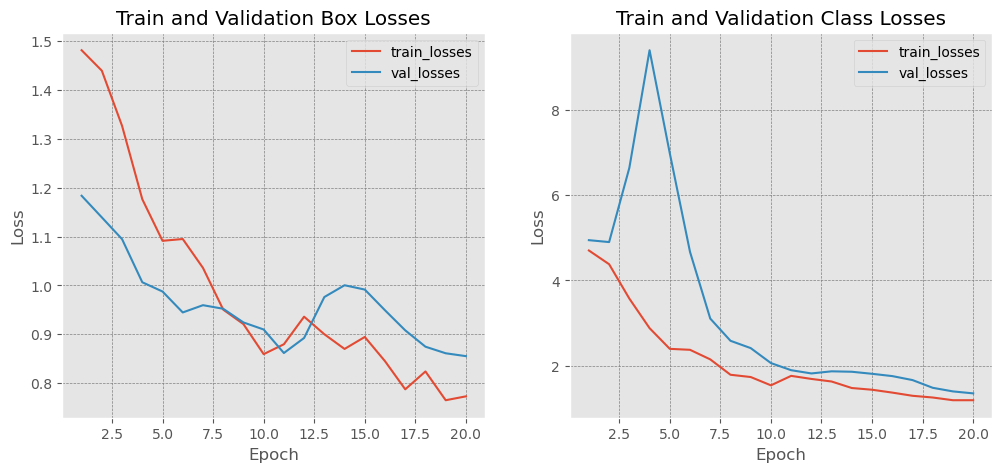

In [5]:
# Remove leading and trailing spaces from column names
result.columns = result.columns.str.strip()

epoch_column = result['epoch']
box_train_losses = result['train/box_loss']
box_val_losses = result['val/box_loss']
cls_train_losses = result['train/cls_loss']
cls_val_losses = result['val/cls_loss']

plt.figure(figsize=(12,5))
plt.style.use('ggplot')  # You can choose a style you prefer
plt.subplot(1,2,1)
plt.plot(epoch_column, box_train_losses, label='train_losses')
plt.plot(epoch_column, box_val_losses, label='val_losses')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')# Add a grid
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Box Losses')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch_column, cls_train_losses, label='train_losses')
plt.plot(epoch_column, cls_val_losses, label='val_losses')
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')# Add a grid
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train and Validation Class Losses')
plt.legend()
plt.show()

(-0.5, 2399.5, 1199.5, -0.5)

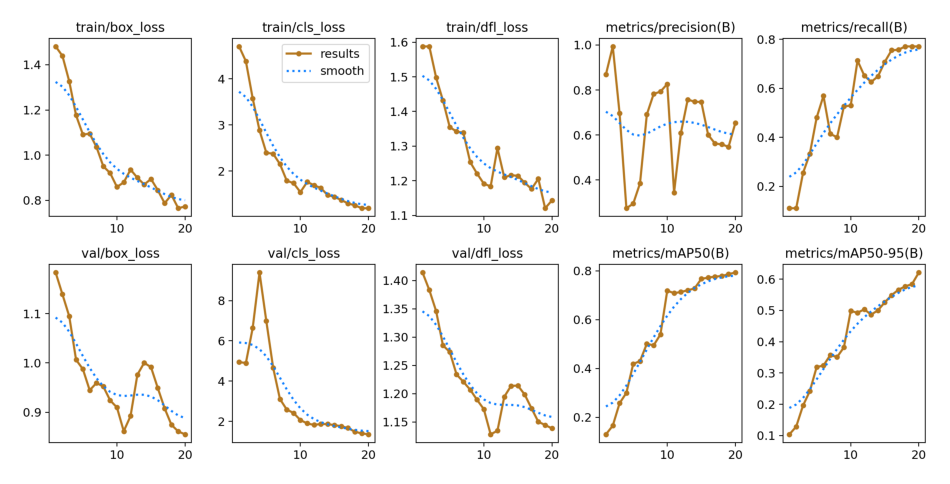

In [8]:
import cv2
plt.figure(figsize=(12,8))
plt.imshow(cv2.imread('./runs/detect/train/results.png'))
plt.axis('off')

#### 모델 Inference

In [54]:
import torch
import numpy as np
import cv2
from time import time
from ultralytics import YOLO

import supervision as sv

class object_detection:
    
    def __init__(self, model_type, capture_index, pre_trained=True):

        self.capture_index = capture_index

        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'
        print("On Device: ", self.device)

        self.model_type = model_type

        self.model = self.load_model(model_type, pre_trained)

        self.CLASS_NAMES_DICT = self.model.model.names
    
        self.box_annotator = sv.BoxAnnotator(sv.ColorPalette.default(), thickness=2, text_thickness=2, text_scale=1)

    def load_model(self, model_type, pre_trained):

        if model_type == 'YOLOv8':
            if pre_trained == True:
                model = YOLO("yolov8s")
            else:
                model = YOLO("./runs/detect/train/weights/best.pt")
        
        return model

    def predict(self, frame):

        results = self.model(frame)

        return results
    
    def plot_bboxes(self, results, frame):
        
        xyxys = []
        confidences = []
        class_ids = []

        # Extract detections for special class
        # for result in results:
        #     boxes = result.boxes.cpu().numpy()
        #     class_id = boxes.cls[0]
        #     conf = boxes.conf[0]
        #     xyxy = boxes.xyxy[0]

        #     if class_id == 0.0:
          
        #       xyxys.append(result.boxes.xyxy.cpu().numpy())
        #       confidences.append(result.boxes.conf.cpu().numpy())
        #       class_ids.append(result.boxes.cls.cpu().numpy().astype(int))

        # Setup detections for visualization
        detections = sv.Detections(
            xyxy = results[0].boxes.xyxy.cpu().numpy(),
            confidence = results[0].boxes.conf.cpu().numpy(),
            class_id = results[0].boxes.cls.cpu().numpy().astype(int)
        )
        
        # print(detections)
        # Format custom labels
        self.labels = [f"{self.CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
        for _, mask, confidence, class_id, tracker_id
        in detections]
        
        # Annotate and display frame
        frame = self.box_annotator.annotate(scene=frame, detections=detections, labels=self.labels)

        return frame


    def __call__(self):

        webcam = cv2.VideoCapture(self.capture_index)
        assert webcam.isOpened()
        webcam.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
        webcam.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)
        
        if not webcam.isOpened():
            print("연결된 카메라가 없습니다. 카메라 연결을 확인해주세요.")
            exit()

        while True:

            start_time = time()

            ret, frame = webcam.read()
            assert ret

            detect_results = self.predict(frame)
            frame = self.plot_bboxes(detect_results, frame)

            end_time = time()
            fps = 1/np.round(end_time - start_time, 2)
            
            cv2.putText(frame, f"FPS: {int(fps)}", (20,70), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,255,0), 2)
            cv2.imshow(f"{self.model_type}_Detection", frame)

            key = cv2.waitKey(20)
            if key == 27: # exit on ESC 
                break

        webcam.release()
        cv2.destroyAllWindows()

In [56]:
detector = object_detection(model_type="YOLOv8", capture_index=0, pre_trained=True)
detector()

On Device:  cuda

0: 384x640 1 spoon, 20.9ms
Speed: 2.0ms preprocess, 20.9ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)
Detections(xyxy=array([[     371.28,      64.817,      709.22,      372.04]], dtype=float32), mask=None, confidence=array([    0.29901], dtype=float32), class_id=array([44]), tracker_id=None)

0: 384x640 1 spoon, 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
Detections(xyxy=array([[     370.35,      63.684,      709.58,      370.75]], dtype=float32), mask=None, confidence=array([    0.26927], dtype=float32), class_id=array([44]), tracker_id=None)

0: 384x640 (no detections), 10.6ms
Speed: 1.5ms preprocess, 10.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
Detections(xyxy=array([], shape=(0, 4), dtype=float32), mask=None, confidence=array([], dtype=float32), class_id=array([], dtype=int32), tracker_id=None)

0: 384x640 (no detections), 11.0ms
Speed: 2.0ms preprocess, 1